In [31]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import cv2
from sklearn.preprocessing import MinMaxScaler

from MeasureCortexThickness import *

In [29]:
# file = os.path.join(data_path, os.getcwd()+ '/data/raw_t1_subject_01.nii.gz')
file = os.path.join(data_path, os.getcwd()+ '/data/raw_t1_subject_02.nii.gz')
img3d = nib.load(file)

print(img3d.shape)

truth_data = img3d.get_fdata()
print(" Affine: "+str(img3d.affine.shape))
# img3d.header
print(img3d.ndim)

# Thresholding
truth_data = img3d.get_fdata()


X = truth_data
t = int((X.shape[0]**3))
X = X.ravel()
X.shape
mean = np.mean(X)
var = np.var(X)
std = np.std(X)
X = X[X>0]
X = X[X<50000]
# X.shape

(256, 256, 256)
 Affine: (4, 4)
3


In [32]:
print("Mean:", mean)
print("Variance:", var)
print("Standard Deviation:", std)

plt.figure(figsize=(10, 5))

ax = sns.kdeplot(X, shade=True)

N = 2
for i in [1, 2, 3]:
    x1 = np.linspace(mean - i*std, mean - (i - 1)*std, N)
    x2 = np.linspace(mean - (i - 1)*std, mean + (i - 1)*std, N)
    x3 = np.linspace(mean + (i - 1)*std, mean + i*std, N)
    x = np.concatenate((x1, x2, x3))
    x = np.where((mean - (i - 1)*std < x) & (x < mean + (i - 1)*std), np.nan, x)
    y = norm.pdf(x, mean, std)
    ax.fill_between(x, y, alpha=0.5)

plt.xlabel("Pixel intensities")
plt.ylabel("Probability Density Function")
# plt.xticks(ticks=range(0, 10))
plt.grid()

plt.show()

Mean: 9.532287418842316
Variance: 569.504807241614
Standard Deviation: 23.864299848133278


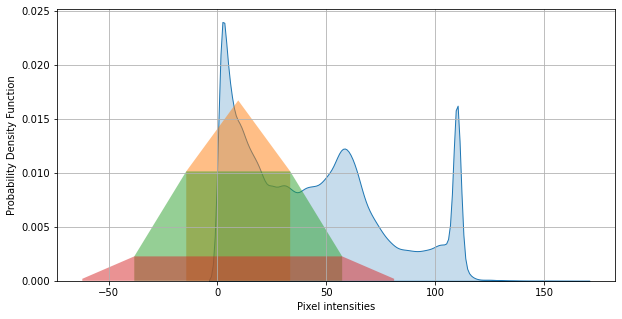

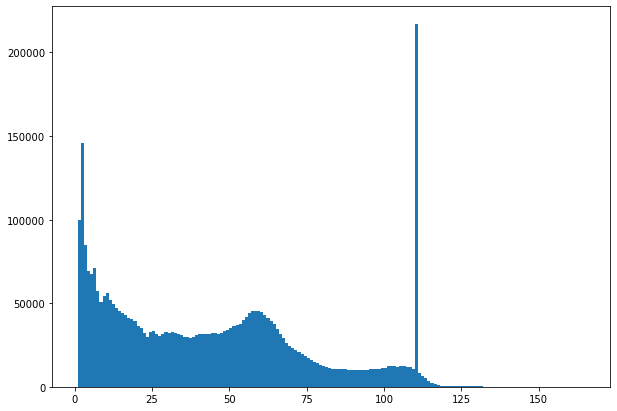

In [33]:
#Constructing histogram for the data

bins = np.arange(np.min(X),np.max(X),1)
fig, ax = plt.subplots(figsize =(10, 7))
# plt.yticks(ticks=np.arange(0,200, 0.1))
ax.hist(X, bins =bins)
 
# Show plot
plt.show()

In [34]:
# file = os.path.join(data_path, os.getcwd()+ '/data/raw_t1_subject_02.nii.gz')
# img3d = nib.load(file)

# img3d.shape

# truth_data = img3d.get_fdata()
# img3d.affine.shape
# img3d.header
# img3d.ndim

# # Thresholding
# truth_data = img3d.get_fdata()
# # Thresholding base on pixel distribution 
# # as from its histogram


# # i,j,k = np.array(truth_data.shape)//3


# X = truth_data
# t = int((X.shape[0]**3))
# X = X.ravel()




# original, mask = slicer(truth_data,   100, SlicerDirection.AXIAL)

# plt.figure(figsize=(8,8))
# plt.imshow(mask, cmap="Greys_r", origin="lower")
    

# data =  np.arange(0,100);
# print(data.shape);
# data = data.reshape(10,10);
# data[:,:]=0.0
# data[2: 8,4:8]=1.0;
# data[5,7]=0;
# data[5,6]=0;
# data[3,6]=0;
# data[2:4,8:]=1.0;
# data[8:9,0:]=1.0;

# print(data)


# (x,y,z) = truth_data.shape
# final_color = np.zeros((x,y,z,3), dtype=np.uint16)

# image_size = truth_data.shape[0];
# channels = 3
# color_max = 255

# direction =[SlicerDirection.AXIAL,SlicerDirection.CORONAL, SlicerDirection.SAGGITAL]

    
# processed_data = measureCortex(SlicerDirection.AXIAL);

# plt.figure(figsize=(8,8))
# # plt.imshow(final_color[70,:,:,:], cmap="Greys_r", origin="lower")
# plt.imshow( processed_data[:,100,:], cmap="viridis", origin="lower")
    

In [35]:
data =  np.arange(0,400);
# print(data.shape);
data = data.reshape(20,20);
data[:,:]=0.0
data[2: 8,4:8]=1.0;
data[5,7]=0;
data[5,6]=0;
data[3,6]=0;
data[2:4,8:]=1.0;
data[8:9,0:]=1.0;
data[2:7,3]=1.0;
data[0,:]=1.0;
data[9:15,:]=1.0;

file = os.path.join(data_path, os.getcwd()+ '/data/raw_t1_subject_02.nii.gz')
img3d = nib.load(file)

# img3d.shape

truth_data = img3d.get_fdata()


measure = MeasureCortexThickness(truth_data);
processed_data = measure.start();

# print(np.max(processed_data)); 
# print(np.min(processed_data)); 
# print(np.mean(processed_data)); 
# print(np.std(processed_data)); 
# print(np.std(processed_data[50,:])); 


plt.figure(figsize=(15,15))

# plt.imshow( processed_data, cmap="viridis",  origin="lower")

# fig, ax = plt.subplots(1,3, figsize =(10, 7))
# plt.imshow(processed_data[120,:,:,:], cmap="Greys_r", origin="lower")
# plt.imshow( processed_data[:,100,:], cmap="viridis", origin="lower")
# ax[0].imshow( measure.original, cmap="viridis",  origin="lower")
# ax[1].imshow( measure.mask, cmap="viridis",  origin="lower")
# ax[2].imshow( processed_data, cmap="viridis",  origin="lower")
    

In [46]:
# measure = MeasureCortexThickness(data);
# process_data_fake = measure.start();  

# plt.imshow( process_data_fake, cmap="viridis",  origin="lower")


IndexError: tuple index out of range

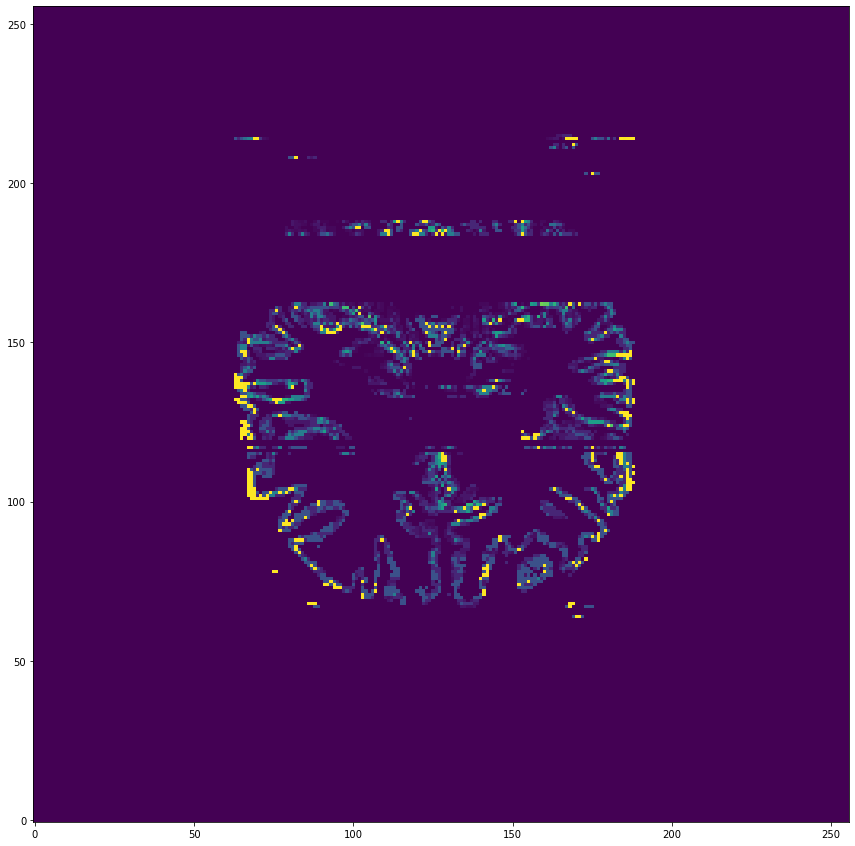

In [45]:
plt.figure(figsize=(15,15))
plt.imshow( measure.img3d[100,:,:], cmap="viridis", origin="lower")

nft_img = nib.Nifti1Image(measure.img3d, img3d.affine)
nib.save(nft_img, os.path.join(os.getcwd(), "subject_02.nii.gz"))


In [9]:
# img3d.orthoview()

In [10]:
# fig = plt.figure(figsize=(8, 8))
# ax = plt.axes(projection='3d') 
# # Creating Dataset
# z = np.linspace(0, 15, 1000)
# x = np.sin(z)
# y = np.cos(z)
# ax.plot3D(x, y, z, 'green')
 
# # 360 Degree view
# for angle in range(0, 360):
#     ax.view_init(angle, 45)
#     plt.draw()
#     plt.pause(.001)
 
# plt.show()